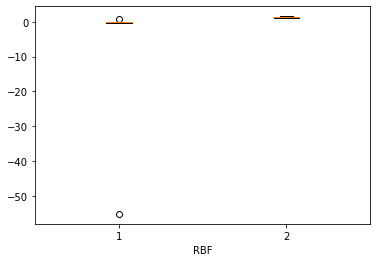

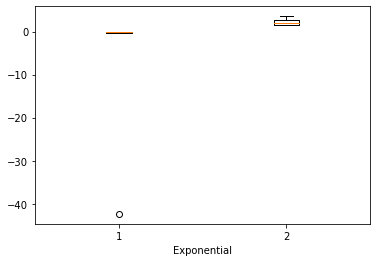

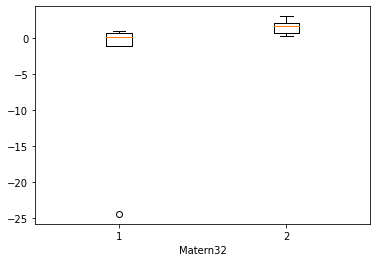

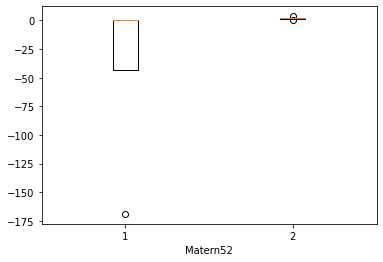

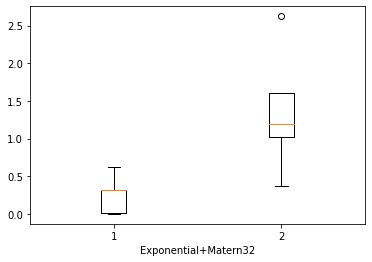

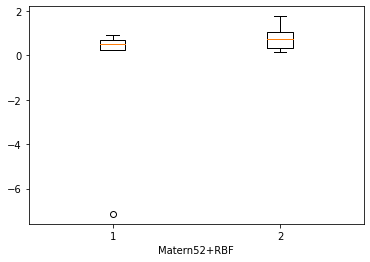

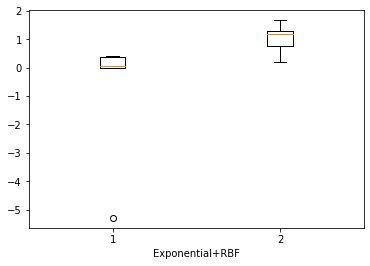

In [1]:
# Libraries for support

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import GPy
from sklearn.metrics import r2_score
from scipy.stats import norm


from Booster_single_obj_new import Booster    

data= open("data.txt","a+")
data.write("kernel name \t points \t len \t var \t R2 score mean \t R2 score stddev \t RMSE mean \t RMSE stddev \t MNLL mean \t MNLL stddev \t Std RMSE mean \t Std RMSE stddev \n")

# Choice of kernel

ks = [ # List of example kernels
    GPy.kern.RBF(4),
    GPy.kern.Exponential(4),
    GPy.kern.Matern32(4),
    GPy.kern.Matern52(4),
    GPy.kern.Exponential(4) + GPy.kern.Matern32(4),
    GPy.kern.Matern52(4)*GPy.kern.RBF(4),
    GPy.kern.Exponential(4) + GPy.kern.RBF(4)
]

# kernel names for input in txt file
kernel_name = ["RBF", "Exponential", "Matern32", "Matern52", "Exponential+Matern32", "Matern52+RBF", "Exponential+RBF"]

# Total number of points
points = [400, 800]

len = [.5, 1, 5] 
varr = [.5, 1, 5]

jj = 0 


def rmse(Y_test, Y_hat):
    return np.sqrt(np.mean((Y_test - Y_hat)**2))



def mnll(Y_test, Y_hat, Cov):
    s = 0
    for i in range(int(test_points)):
        s = s + norm.pdf((Y_test[i]-Y_hat[i])/Cov[i,i])
    return s/test_points


def stdrmse(Y_test, Y_hat):
    return np.sqrt(np.mean((np.mean(Y_test) - np.mean(Y_hat))**2))
    

for k in ks: 
    
    for l in len: 
        
        k.lengthscale = l  
            
        for v in varr:   
        
            k.variance = v  
            
            for total_points in points: 


                training_points = np.floor(0.8*total_points) 
                training_points = int(training_points)


                X_train1 = np.random.uniform(0, 1, (training_points, 4))
                X_train2 = np.random.uniform(0, 1, (training_points, 4))
                X_train3 = np.random.uniform(0, 1, (training_points, 4))
                X_train4 = np.random.uniform(0, 1, (training_points, 4))
                X_train5 = np.random.uniform(0, 1, (training_points, 4))


                Y_train1 = np.random.uniform(0, 0, (training_points, 1))
                Y_train2 = np.random.uniform(0, 0, (training_points, 1))
                Y_train3 = np.random.uniform(0, 0, (training_points, 1))
                Y_train4 = np.random.uniform(0, 0, (training_points, 1))
                Y_train5 = np.random.uniform(0, 0, (training_points, 1))
                Cons = np.random.uniform(0, 0, (9, training_points))

                for i in range(training_points):
                    Y_train1[i],Cons[:,i]=Booster(X_train1[i,:])
                    Y_train2[i],Cons[:,i]=Booster(X_train2[i,:])
                    Y_train3[i],Cons[:,i]=Booster(X_train3[i,:])
                    Y_train4[i],Cons[:,i]=Booster(X_train4[i,:])
                    Y_train5[i],Cons[:,i]=Booster(X_train5[i,:])


                test_points = total_points - training_points

                X_test1 = np.random.uniform(0, 1, (test_points, 4))
                X_test2 = np.random.uniform(0, 1, (test_points, 4))
                X_test3 = np.random.uniform(0, 1, (test_points, 4))
                X_test4 = np.random.uniform(0, 1, (test_points, 4))
                X_test5 = np.random.uniform(0, 1, (test_points, 4))
                

                m1 = GPy.models.GPRegression(X_train1, Y_train1, k)
                m1.optimize()
                Y_hat1, Cov1 = m1.predict_noiseless(X_test1, full_cov=True)
                m2 = GPy.models.GPRegression(X_train2, Y_train2, k)
                m2.optimize()
                Y_hat2, Cov2 = m2.predict_noiseless(X_test2, full_cov=True)
                m3 = GPy.models.GPRegression(X_train3, Y_train3, k)
                m3.optimize()
                Y_hat3, Cov3 = m3.predict_noiseless(X_test3, full_cov=True)
                m4 = GPy.models.GPRegression(X_train4, Y_train4, k)
                m4.optimize()
                Y_hat4, Cov4 = m4.predict_noiseless(X_test4, full_cov=True)
                m5 = GPy.models.GPRegression(X_train5, Y_train5, k)
                m5.optimize()
                Y_hat5, Cov5 = m5.predict_noiseless(X_test5, full_cov=True)


                Y_test1 = np.random.uniform(0, 0, (test_points, 1))
                Y_test2 = np.random.uniform(0, 0, (test_points, 1))
                Y_test3 = np.random.uniform(0, 0, (test_points, 1))
                Y_test4 = np.random.uniform(0, 0, (test_points, 1))
                Y_test5 = np.random.uniform(0, 0, (test_points, 1))
                Cons2 = np.random.uniform(0, 0, (9, test_points))

                for i in range(test_points):
                    Y_test1[i],Cons2[:,i]=Booster(X_test1[i,:])
                    Y_test2[i],Cons2[:,i]=Booster(X_test2[i,:])
                    Y_test3[i],Cons2[:,i]=Booster(X_test3[i,:])
                    Y_test4[i],Cons2[:,i]=Booster(X_test4[i,:])
                    Y_test5[i],Cons2[:,i]=Booster(X_test5[i,:])


                error11 = r2_score(Y_test1, Y_hat1)
                error12 = r2_score(Y_test2, Y_hat2)
                error13 = r2_score(Y_test3, Y_hat3)
                error14 = r2_score(Y_test4, Y_hat4)
                error15 = r2_score(Y_test5, Y_hat5)

                error1s = [error11, error12, error13, error14, error15] 

                error1 = np.mean(error1s)
                error1_std = np.std(error1s)

     

                error21 = rmse(Y_test1, Y_hat1)
                error22 = rmse(Y_test2, Y_hat2)
                error23 = rmse(Y_test3, Y_hat3)
                error24 = rmse(Y_test4, Y_hat4)
                error25 = rmse(Y_test5, Y_hat5)

                error2s = [error21, error22, error23, error24, error25] 

                error2 = np.mean(error2s)
                error2_std = np.std(error2s)

          

                error31 = mnll(Y_test1, Y_hat1, Cov1)
                error32 = mnll(Y_test2, Y_hat2, Cov2)
                error33 = mnll(Y_test3, Y_hat3, Cov3)
                error34 = mnll(Y_test4, Y_hat4, Cov4)
                error35 = mnll(Y_test5, Y_hat5, Cov5)

                error3s = [error31, error32, error33, error34, error35] 

                error3 = np.mean(error3s)
                error3_std = np.std(error3s)
           

                error41 = stdrmse(Y_test1, Y_hat1)
                error42 = stdrmse(Y_test2, Y_hat2)
                error43 = stdrmse(Y_test3, Y_hat3)
                error44 = stdrmse(Y_test4, Y_hat4)
                error45 = stdrmse(Y_test5, Y_hat5)

                error4s = [error41, error42, error43, error44, error45] 

                error4 = np.mean(error4s)
                error4_std = np.std(error4s)



                data.write("%s & \t" % (kernel_name[jj]))
                data.write("%f & \t" % (total_points))
                data.write("%f & \t" % (l))
                data.write("%f & \t" % (v))
                data.write("%f & \t" % (error1))
                data.write("%f & \t" % (error1_std))
                data.write("%f & \t" % (error2))
                data.write("%f & \t" % (error2_std))
                data.write("%f & \t" % (error3))
                data.write("%f & \t" % (error3_std))
                data.write("%f & \t" % (error4))
                data.write("%f \\\ \hline \n" % (error4_std))
                plt.xlabel(kernel_name[jj])
                plt.boxplot((error1s, error2s))
                plt.savefig(kernel_name[jj])
                plt.show()
    jj = jj+1

data.close() 